Problem Set 1: http://cs229.stanford.edu/ps/ps1/ps1.pdf
# 1. Logistic regression

## 1.a.

$$
\begin{align}
J(\theta) & = \frac{1}{m} \sum_{k=1}^m log(1+e^{-y^{(k)}\theta^T x^{(k)}}) \\ 
& = - \frac{1}{m}\sum_{k=1}^{m} log(g(z^{(k)}))
\end{align}
$$

where $y^{(i)} \in \{ -1, 1 \}$, $g(z^{(k)}) = \frac{1}{1 + e^{-z^{(k)}}}$, $z^{(k)} = y^{(k)} \theta^T x^{(k)}$

and $\frac{\partial g}{\partial z} = g(1-g)$

so,

$$
\begin{align}
\frac{\partial J}{\partial \theta_i} & = - \frac{1}{m} \sum_{k=1}^m \frac{1}{g(z^{(k)})} \frac{\partial g(z^{(k)})}{\partial z^{(k)}} \frac{\partial z^{(k)}}{\partial \theta_i} \\
& = - \frac{1}{m} \sum_{k=1}^m \frac{1}{g(z^{(k)})} g(z^{(k)})(1 - g(z^{(k)}) \frac{\partial z^{(k)}}{\partial \theta_i} \\
& = - \frac{1}{m} \sum_{k=1}^m (1 - g(z^{(k)})) \frac{\partial z^{(k)}}{\partial \theta_i} \\
& = - \frac{1}{m} \sum_{k=1}^m (1 - g(z^{(k)})) y^{(k)} x_i^{(k)} \\
& = \frac{1}{m} \sum_{k=1}^m (g(z^{(k)}) - 1) y^{(k)} x_i^{(k)}
\end{align}
$$

then, because $y^{(i)} \in \{ -1, 1 \}$,

$$
\begin{align}
H_{ij} = \frac{\partial J}{\partial \theta_i \partial \theta_j} 
& = \frac{1}{m} \sum_{k=1}^m (\frac{\partial (g(z^{(k)}) - 1))}{\partial \theta_j} y^{(k)} x_i^{(k)} \\
& = \frac{1}{m} \sum_{k=1}^m \frac{\partial g(z^{(k)})}{\partial \theta_j} y^{(k)} x_i^{(k)} \\
& = \frac{1}{m} \sum_{k=1}^m g(z^{(k)})(1-g(z^{(k)})) \frac{\partial z^{(k)}}{\partial \theta_j} y^{(k)}x_i^{(k)} \\
& = \frac{1}{m} \sum_{k=1}^m g(z^{(k)})(1-g(z^{(k)}))  y^{(k)}x_j^{(k)}y^{(k)}x_i^{(k)} \\
& = \frac{1}{m} \sum_{k=1}^m g(z^{(k)})(1-g(z^{(k)})) x_i^{(k)}x_j^{(k)}
\end{align}
$$

then,

$$
\begin{align}
z^THz & = \sum_{i=1}^m \sum_{j=1}^m z_iH_{ij}z_j \\
& =  \sum_{i=1}^m \sum_{j=1}^m z_i \biggl[ \frac{1}{m} \sum_{k=1}^m g(z^{(k)})(1-g(z^{(k)})) x_i^{(k)}x_j^{(k)} \biggr] z_j \\
& = \frac{1}{m} \sum_{k=1}^{m} g(z)(1-g(z)) \sum_{i=1}^n \sum_{j=1}^n z_i x_i^{(k)} x_j^{(k)}z_j \\
& = \frac{1}{m} \sum_{k=1}^{m} g(z)(1-g(z)) ((x^{(k)})^Tz)^2
\end{align}
$$

because $0<g(z)<1$, $z^TH \ge 0$, so $H$ is PSD, which implies that J is convex, and has no local minima other than the global one.

## 1.b.

Newton's method converge to $f(\theta) = 0$, which is $\frac{\partial J}{\partial \theta}$ in this case.

$$
\theta := \theta - \frac{\nabla_\theta J(\theta)}{H}
$$

We have,

$$z^{(k)} = y^{(k)} \theta^T x^{(k)}$$

$$g(z^{(k)}) = \frac{1}{1 + e^{-z^{(k)}}}$$

$$
\frac{\partial J}{\partial \theta_i} 
 = \frac{1}{m} \sum_{k=1}^{m} (g(z^{(k)}) - 1) y^{(k)} x_i^{(k)}
$$

$$
H_{ij} = \frac{1}{m} \sum_{k=1}^{m} g(z^{(k)})(1 - g(z^{(k)})) x_i^{(k)} x_j^{(k)}
$$

In [5]:
import numpy as np
import pandas as pd
import matplotlib.colors as pltcolor
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
# load data
X_df = pd.read_table('http://cs229.stanford.edu/ps/ps1/logistic_x.txt', sep = '\s+', names = ['x1', 'x2'], dtype = {'x1': np.float64, 'x2': np.float64})
y_df = pd.read_table('http://cs229.stanford.edu/ps/ps1/logistic_y.txt', names = ['y'], dtype = {'y': np.int})
data = X_df.copy()
data['y'] = y_df
print(data.shape)
print(data['y'].value_counts())

(99, 3)
-1    50
 1    49
Name: y, dtype: int64


In [7]:
data.head()

,x1,x2,y
0,1.343250,-1.331148,-1
1,1.820553,-0.634668,-1
2,0.986321,-1.888576,-1
3,1.944373,-1.635452,-1
4,0.976734,-1.353315,-1


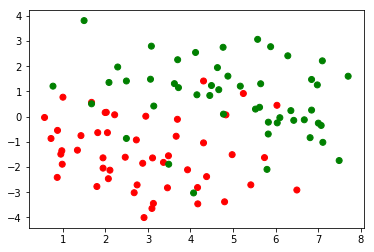

In [8]:
# plot
colors = ['red', 'green']
plt.scatter(data['x1'], data['x2'], c=y_df, cmap = pltcolor.ListedColormap(colors))
plt.show()

In [9]:
# adding a columns of one for theta 0
X = X_df.as_matrix()
X = np.hstack([np.ones((X.shape[0], 1)), X])
y = y_df.as_matrix()
print("X shape {0}".format(X.shape))
print("y shape {0}".format(y.shape))

X shape (99, 3)
y shape (99, 1)


In [10]:
# calculate gradient and hessian
def calculate_gradient_hessian(X, y, theta):
    z = X.dot(theta) * y
    print("z shape {0}".format(z.shape))
    g = 1.0 / (1 + np.exp(-z))
    print("g shape {0}".format(g.shape))
    gradient = np.mean((g - 1) * y * X, axis = 0).reshape(theta.shape)
    print("gradient shape {0}".format(gradient.shape))
    print(gradient)
    hessian = np.zeros((X.shape[1], X.shape[1]))
    for i in range(int(hessian.shape[0])):
        for j in range(int(hessian.shape[0])):
            if (i <= j):
                hessian[i][j] = np.mean(g * (1 - g) * X[:, i].reshape(X.shape[0], 1) * X[:, j].reshape(X.shape[0], 1), axis = 0)
            hessian[j][i] = hessian[i][j]
    print("hessian shape {0}".format(hessian.shape))
    print(hessian)
    delta = np.linalg.inv(hessian).dot(gradient)
    return theta - delta

In [11]:
# training
theta_records = []

theta = np.zeros((X.shape[1], 1))
diff = 1
iter = 0
print(theta.shape)
while diff > 1e-9:
    print('--------------------iteration {0}------------------'.format(iter))
    theta_records.append(theta)
    theta = calculate_gradient_hessian(X, y, theta)
    diff = np.sum(np.abs(theta - theta_records[-1]))
    iter += 1
    
print("converge after {0} iterations".format(iter))

(3, 1)
--------------------iteration 0------------------
z shape (99, 1)
g shape (99, 1)
gradient shape (3, 1)
[[ 0.00505051]
 [-0.48150553]
 [-0.55483063]]
hessian shape (3, 3)
[[ 0.25        0.98082384 -0.08742426]
 [ 0.98082384  4.76984544 -0.18171064]
 [-0.08742426 -0.18171064  0.80740309]]
--------------------iteration 1------------------
z shape (99, 1)
g shape (99, 1)
gradient shape (3, 1)
[[ 0.00051294]
 [-0.11086799]
 [-0.13284818]]
hessian shape (3, 3)
[[ 0.16610573  0.647951   -0.05330463]
 [ 0.647951    3.09606595 -0.22492582]
 [-0.05330463 -0.22492582  0.42035316]]
--------------------iteration 2------------------
z shape (99, 1)
g shape (99, 1)
gradient shape (3, 1)
[[ 0.00076052]
 [-0.02500992]
 [-0.03614105]]
hessian shape (3, 3)
[[ 0.12033999  0.46792056 -0.03432116]
 [ 0.46792056  2.22142345 -0.19777472]
 [-0.03432116 -0.19777472  0.25028986]]
--------------------iteration 3------------------
z shape (99, 1)
g shape (99, 1)
gradient shape (3, 1)
[[ 0.00022389]
 [-0.00

/Users/cong/anaconda/envs/dl-tf/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in true_divide


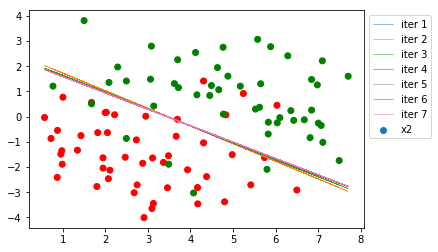

In [12]:
# plot
colors = ['red', 'green']
plt.scatter(data['x1'], data['x2'], c=y, cmap = pltcolor.ListedColormap(colors))
xs = X[:,1]
for k, theta in enumerate(theta_records):
    ys = (theta[0] + theta[1] * xs) / (-theta[2])
    plt.plot(xs, ys, label='iter {0}'.format(k + 1), lw=0.5)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()